In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
%matplotlib inline

In [72]:
ls=load_iris()

In [73]:
dir(ls)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [74]:
ls.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [75]:
df=pd.DataFrame(ls.data,columns=ls.feature_names)

In [76]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [77]:
df['targets']=ls.target

In [78]:
df.drop(['petal length (cm)','petal width (cm)'],axis=1,inplace=True)

In [79]:
df

,sepal length (cm),sepal width (cm),targets
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


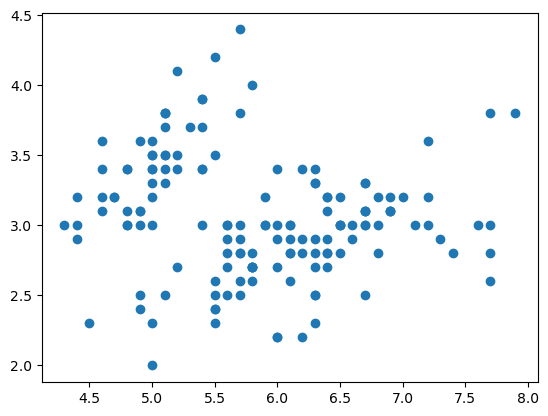

In [80]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [81]:
scalar=MinMaxScaler()

In [82]:
df['sepal length (cm)']=scalar.fit_transform(df[['sepal length (cm)']])

In [83]:
df.head()

,sepal length (cm),sepal width (cm),targets
0,0.222222,3.5,0
1,0.166667,3.0,0
2,0.111111,3.2,0
3,0.083333,3.1,0
4,0.194444,3.6,0


In [84]:
df['sepal width (cm)']=scalar.fit_transform(df[['sepal width (cm)']])

In [85]:
df.head()

,sepal length (cm),sepal width (cm),targets
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0


In [87]:
# df[df.clusters==0].head()

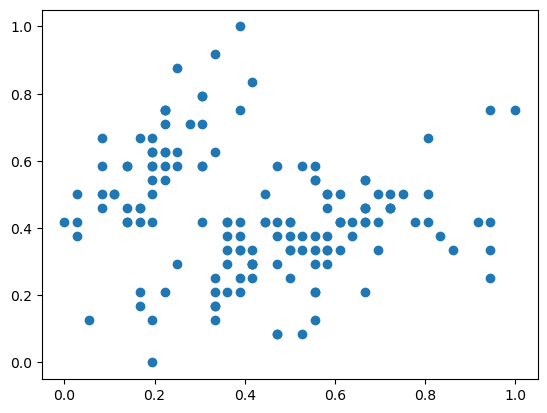

In [88]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])

In [89]:
find_k=range(1,10)
wecc=[]
for i in find_k:
    km=KMeans(n_clusters=i)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    wecc.append(km.inertia_)

C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

In [90]:
wecc

[12.797757201646087,
 6.8552905260332775,
 4.137446609550964,
 3.402790845289638,
 2.700768170711747,
 2.1146665316298954,
 2.0410958519210145,
 1.6258903908147238,
 1.370694146978182]

In [91]:
x=df.drop('targets',axis=1)

In [92]:
x.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


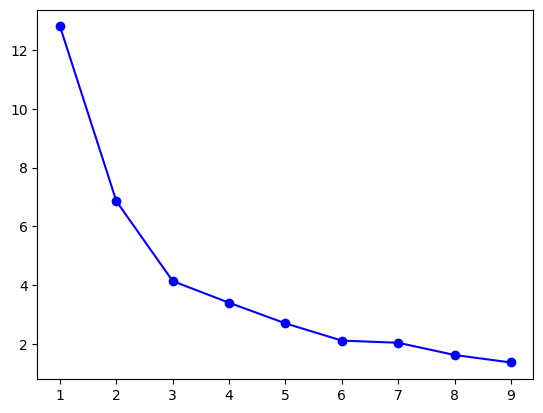

In [93]:
plt.plot(find_k,wecc,'bo-')

In [94]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [95]:
km.fit(x)

C:\Users\BHANU PRASAD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [96]:
# y_pridict=km.predict(x)
# df['clusters']=y_pridict

In [97]:
# y_pridict

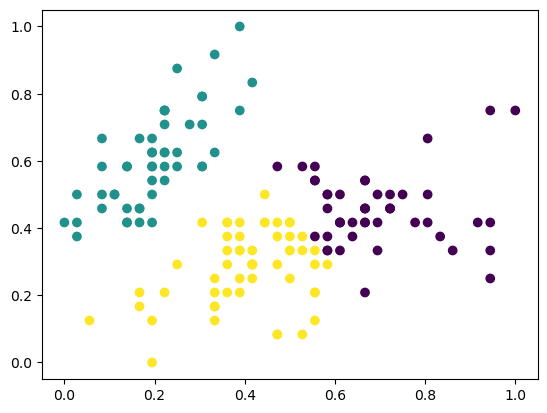

In [98]:
plt.scatter(x['sepal length (cm)'],x['sepal width (cm)'],c=km.labels_)
# df1=df[df['clusters']==0]
# df2=df[df['clusters']==1]
# df3=df[df['clusters']==2]
# plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],c='red')
# plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],c='green')
# plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],c='blue')
# plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',marker='*')

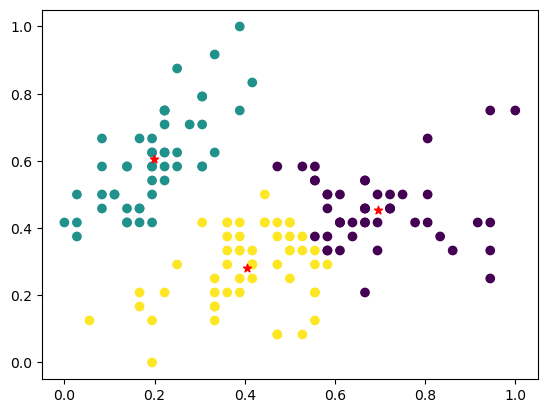

In [99]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=km.labels_)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='red',marker='*')

In [100]:
from sklearn.metrics import silhouette_score

In [101]:
score=silhouette_score(df,y_pridict)

In [102]:
score

0.772396512324364

In [103]:
x=df.drop('targets',axis=1)
y=df.targets

In [104]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: targets, Length: 150, dtype: int32

In [105]:
from sklearn.metrics import classification_report

In [106]:
report=classification_report(y,y_pridict)

In [107]:
print(report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00        50

    accuracy                           0.33       150
   macro avg       0.33      0.33      0.33       150
weighted avg       0.33      0.33      0.33       150

